# 时间测量统计分布实验

1. 记录 210 个数据，上课时使用实验记录纸手写记录的，建议直接丢给 ChatGPT 识别生成 csv 文件。
2. 计算平均值和标准差

In [2]:
import pandas as pd

data = pd.read_csv('data.csv')
describe_data = data.describe()
describe_data

,time_data
count,200.000000
mean,2.999750
std,0.126822
min,2.630000
25%,2.930000
50%,3.000000
75%,3.070000
max,3.780000


3. 画出图和表

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the table with intervals from 3.4 to 4.4 with a step of 0.1
bins = [round(2.6 + i * 0.03, 2) for i in range(41)]  # Creates bins [3.4, 3.5, ..., 4.4]

# Categorizing the data into bins
data['interval'] = pd.cut(data['time_data'], bins=bins)

# Calculating frequency (n_i), probability (n_i / N), and probability density (n_i / (n * ΔT))
N = len(data)
delta_T = 0.1  # Interval width

# Group by intervals and calculate relevant statistics
table_data = data['interval'].value_counts(sort=False).reset_index()
table_data.columns = ['Interval', 'Frequency']

table_data['Probability'] = (table_data['Frequency'] / N).round(4)
table_data['Probability Density'] = (table_data['Frequency'] / (N * delta_T)).round(4)

mean_T = data['time_data'].mean()
std_T = data['time_data'].std()

# The midpoints (T_i) of each interval are the averages of the bin edges
midpoints = [((bins[i] + bins[i + 1]) / 2) for i in range(len(bins) - 1)]

# Calculate the normal distribution values p(T_i) for each midpoint
normal_distribution_values = [(1 / (std_T * np.sqrt(2 * np.pi))) * np.exp(-((T_i - mean_T) ** 2) / (2 * std_T ** 2)) for T_i in midpoints]

table_data['Midpoint T_i'] = midpoints
table_data['Midpoint T_i'] = table_data['Midpoint T_i'].round(3)

table_data['Normal Distribution p(T_i)'] = normal_distribution_values
table_data['Normal Distribution p(T_i)'] = table_data['Normal Distribution p(T_i)'].round(4)

table_data

,Interval,Frequency,Probability,Probability Density,Midpoint T_i,Normal Distribution p(T_i)
0,"(2.6, 2.63]",1,0.005,0.05,2.615,0.0316
1,"(2.63, 2.66]",0,0.000,0.00,2.645,0.0629
2,"(2.66, 2.69]",1,0.005,0.05,2.675,0.1185
3,"(2.69, 2.72]",2,0.010,0.10,2.705,0.2112
4,"(2.72, 2.75]",2,0.010,0.10,2.735,0.3560
5,"(2.75, 2.78]",1,0.005,0.05,2.765,0.5672
6,"(2.78, 2.81]",3,0.015,0.15,2.795,0.8545
7,"(2.81, 2.84]",6,0.030,0.30,2.825,1.2174
8,"(2.84, 2.87]",14,0.070,0.70,2.855,1.6400
9,"(2.87, 2.9]",11,0.055,0.55,2.885,2.0890


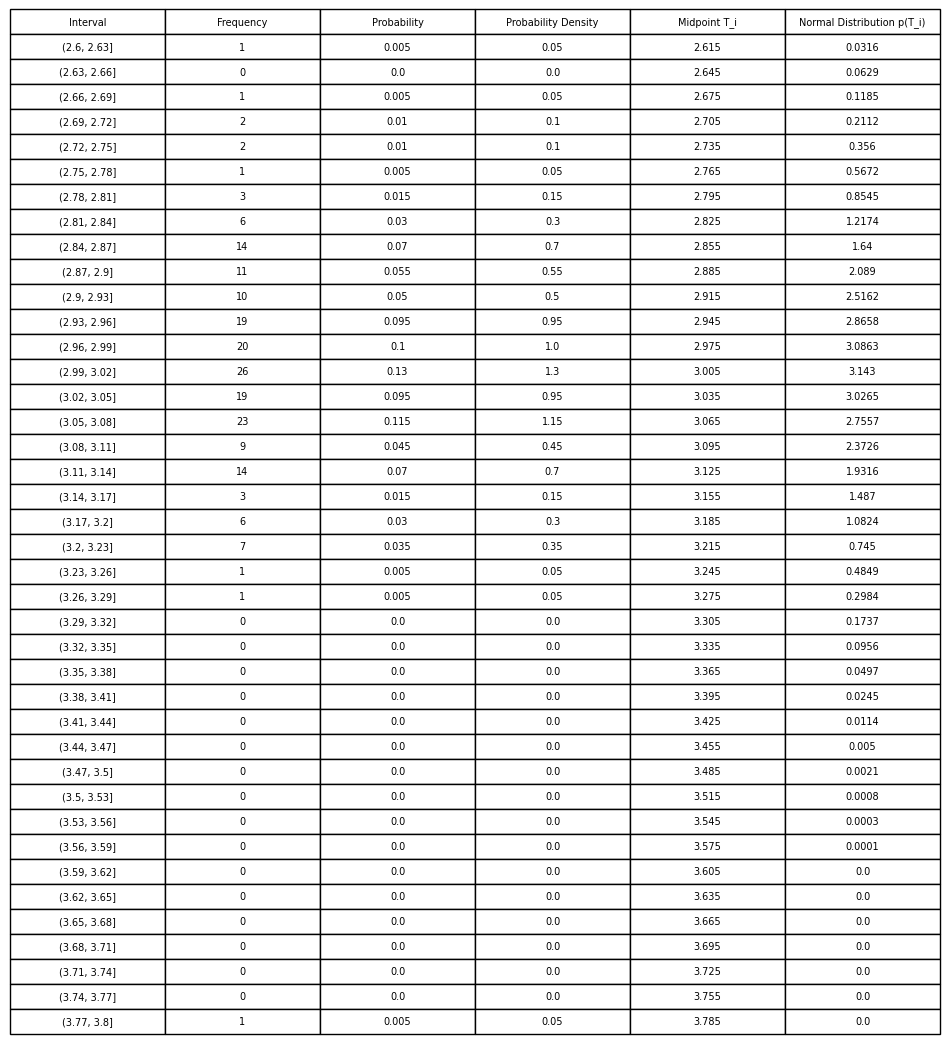

In [8]:
# Create a plot figure
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust figure size

# Hide the axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table on the figure
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')

# Adjust table scaling
table.scale(1, 1.5)

# Save the table as an image
plt.savefig('./table_image.png', bbox_inches='tight', dpi=300)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Heiti TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Heiti TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Heiti TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Heiti TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Heiti TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Heiti TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Heiti TC
C:\Users\dazho\AppData\Local\Temp\ipykernel_125868\421423053.py:23: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) DejaVu Sans.
  plt.savefig('./histogram.png', bbox_inches='tight', dpi=300)
C:\Users\dazho\AppDat

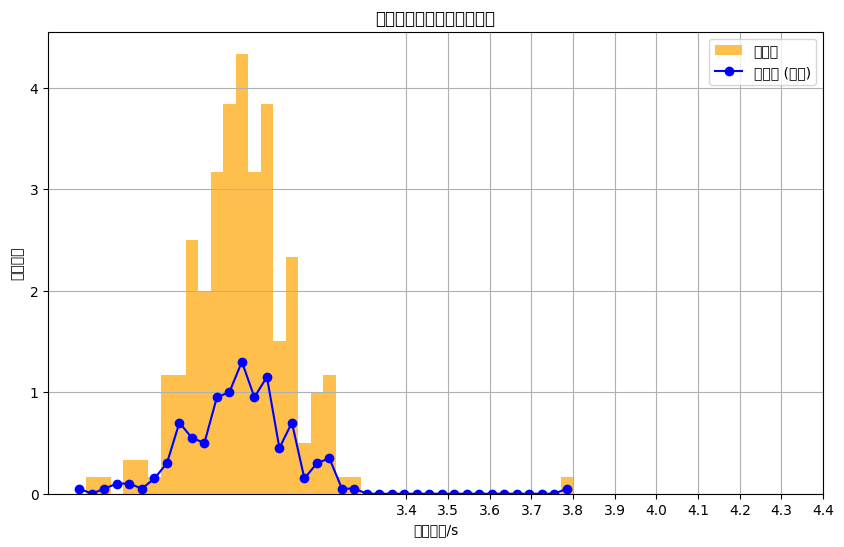

In [9]:
# Plotting histogram and scatter plot (with connected lines) on the same figure
# a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
# Chinese support
plt.rcParams['font.sans-serif'] = ['Heiti TC'] 

plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(data['time_data'], bins=bins, color='orange', alpha=0.7, label='直方图', density=True)

# Overlay the scatter plot with connected lines
plt.plot(table_data['Midpoint T_i'], table_data['Probability Density'], color='blue', marker='o', linestyle='-', label='折线图 (散点)')

# Adding labels and title
plt.title('概率密度的直方图和折线图')
plt.xticks(np.arange(3.4, 4.4, 0.1))
plt.xlabel('时间区间/s')
plt.ylabel('概率密度')
plt.legend()

# Saving the combined figure
plt.grid(True)
plt.savefig('./histogram.png', bbox_inches='tight', dpi=300)


4. 计算 3 个置信区间内的概率，并与理论值比较

In [10]:
import numpy as np
from scipy.stats import norm

# define K values for confidence intervals
k_values = [1, 2, 3]

# Function to calculate the proportion of data within a given interval
def calculate_probability_within_interval(mean, std, k, data):
    lower_bound = mean - k * std
    upper_bound = mean + k * std
    # Count the number of data points within the bounds
    within_interval = data[(data >= lower_bound) & (data <= upper_bound)]
    probability = len(within_interval) / len(data)
    return probability

# Calculate actual probabilities for each k
actual_probabilities = [calculate_probability_within_interval(mean_T, std_T, k, data['time_data']) for k in k_values]

# Create a table with the calculated probabilities
confidence_intervals_table = pd.DataFrame({
    '置信区间': [f'[T̄-{k}σ, T̄+{k}σ]' for k in k_values],
    '实际概率': np.round(actual_probabilities, 4),
    '理论值': [0.6827, 0.9545, 0.9973]  # Theoretical values from normal distribution
})

confidence_intervals_table


,置信区间,实际概率,理论值
0,"[T̄-1σ, T̄+1σ]",0.705,0.6827
1,"[T̄-2σ, T̄+2σ]",0.970,0.9545
2,"[T̄-3σ, T̄+3σ]",0.995,0.9973


5. 计算各类不确定度

In [6]:
# calculate uncertainty A
uncertainty_A = std_T / np.sqrt(len(data))

# calculate uncertainty B
delta_estimate = 0.2
delta_instrumen = 0.01
C = 3
uncertainty_B = np.sqrt(delta_estimate**2 + delta_instrumen**2) / C

# print(uncertainty_B)

# combine uncertainties
t_p = 1.96
k_p = 1.96
uncertainty_combined = np.sqrt((t_p * uncertainty_A)**2 + (k_p * uncertainty_B)**2)

np.round([uncertainty_A, uncertainty_B, uncertainty_combined], 4)

array([0.009 , 0.0667, 0.132 ])